# Section 1: Documentation

## Defining the data analytic question



> **Objectives:** To study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.



##Specifying the data analytic question



> What factors influence the housing pricing and to what degree?



## Metric of success


## Recording the experimental design



> Here is a breakdown of the steps taken to solve the data analytic question


1. Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective. 

2. Reading the data: Reading our data with and aim to understand the variables and observations. 

3. Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4. Data cleaning, will perform all data cleaning and preparation to make the data ready for analysis.

5. EDA, the data will be analysed and visualized.

6. Implementing the solution using univariate, bivariate, multivariate analaysis
7. Performing regression analysis.
      * Incorporate categorical independent variables into your models.
8. Check for multicollinearity
      * Provide a recommendation based on your analysis. 
9. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
10. Challenge your solution by providing insights on how you can make improvements in model improvement.



## Data Relevance


> The data is relevant to the research question asked as it evaluates the data set to identify whether the information within is useful to solve the identfied problem



# Section 2: Reading and initial Data Exploration

In [1]:
#Importing necessary libraries
#importing numpy wich contains a multi-dimensional array and matrix data structures
import numpy as np
#importing pandas for data manipulation and analysis
import pandas as pd
from pandas.testing import assert_frame_equal
#Importing matplotlib for creating static, animated, and interactive visualizations
import matplotlib
#Importing pyplot from matplotlib 2D graphics
from matplotlib import pyplot as plt
#importing seaborn for data visualization
import seaborn as sns
#importing Standardscaler
from sklearn.preprocessing import StandardScaler
# Dividing our data into training and test sets
from sklearn.model_selection import train_test_split
#Importing GridSearchCv from model selection from sklearn library
from sklearn.model_selection import GridSearchCV
# Function to run the cross validation.
from sklearn.model_selection import KFold
# Importing linear models
from sklearn import linear_model
#Importing Linear regression from  sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Importing Ridge regression from sklearn
from sklearn.linear_model import Ridge
#Import lasso module from the sklearn library
from sklearn.linear_model import Lasso
#Importing elastic net module from sklearn
from sklearn.linear_model import ElasticNet
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')


print('libraries imported')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


libraries imported


## Checking the data packaging

In [31]:
df_house = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df_house.head() #Displaying the first five rows

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df_house.tail() #Displaying the five bottom rows

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [33]:
df_house.columns #Displaying the columns of the dataset

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
#Checking the shape of the dataset
shape = df_house.shape

print('The dataset has', shape[0], 'number of rows.', 'and', shape[1], 'number of columns')

The dataset has 21613 number of rows. and 20 number of columns


# Section 3: Data Cleaning


## Validity

In [35]:
#Dropping the id column from the dataset
df_val = df_house.drop(['id'], axis = 1)
df_val

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


The columns left after dropping the id column in the dataframe are valid for analysis 

## Completeness

In [36]:
#Checking for null values
df_val.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the dataset

## Consistency

In [37]:
df_val.duplicated().any()

True

In [38]:
#creating a dataframe for duplicate values
df_dup = df_val[df_val.duplicated()]
df_dup

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


We will retain the duplicated entries since they are necessary for analysis

## Uniformity

In [39]:
#checking for data types
df_val.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [40]:
#Changing price and floors from float to integers
df_val['price'] = df_val['price'].astype(int) #Changing price column from float to an integer
df_val['floors'] = df_val['floors'].astype(int) #Changing floors column from float to an integer
#Confirming change in data types
df_val.dtypes

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [41]:
# uniformity of entries
# A for loop is used to print out the unique values for each column
#
for column in df_val.columns:            # Iterating through each column in the dataframe
  print('\n')                        # Creating a new line for better readability
  print(df_val[column])              # Printing the column name for better readability
  print(df_val[column].nunique())    # Printing the number of unique values in each column
  print(df_val[column])
  print(df_val[column].unique())     # Printing only unique values in each column
  print('\n')    



0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64
3625
0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64
[221900 538000 180000 ... 541800 610685 402101]




0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64
13
0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]




0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
216

In [42]:
#Checking how many entries have 33 bedrooms

df_33 = df_val[df_val['bedrooms'] == 33] #From the output, we have only one entry
df_33

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000,33,1.75,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


This is a wrong entry since we cannot have 33 bedrooms with 1.75 bathrooms with only one level floor. We will drop this entry since it will interfere with predictions

In [43]:
#Droping the bedrooms that is equal to 33
df = df_val[((df_val['bedrooms']< 33))]

## Checking for outliers


### numerical data

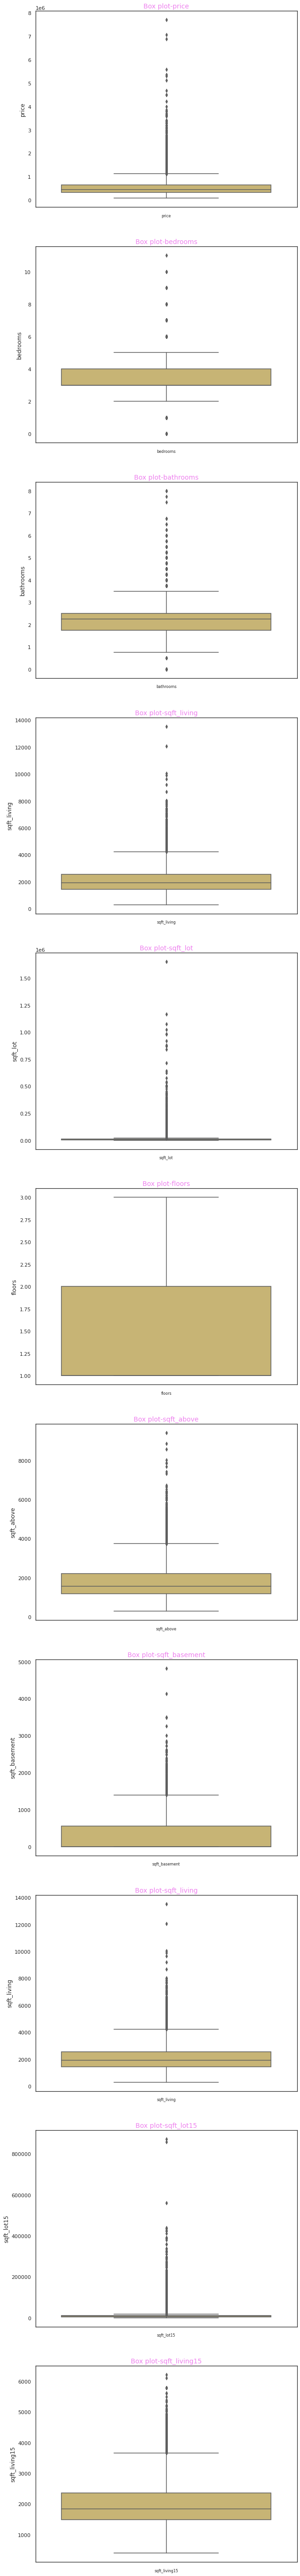

In [45]:
num_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot15', 'sqft_living15']
col_names = num_columns

fig, ax = plt.subplots(len(col_names), figsize = (10, 100))
color= ["y", "g", "r", "c", "k","m", 'w']
for i, col_val in enumerate(col_names):

  sns.boxplot(y= df[col_val], ax=ax[i], palette = color )
  ax[i].set_title('Box plot-{}'.format(col_val),color = 'violet', fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

We will retain the outliers since they are necessary in the prediction analysis

### Categorical data

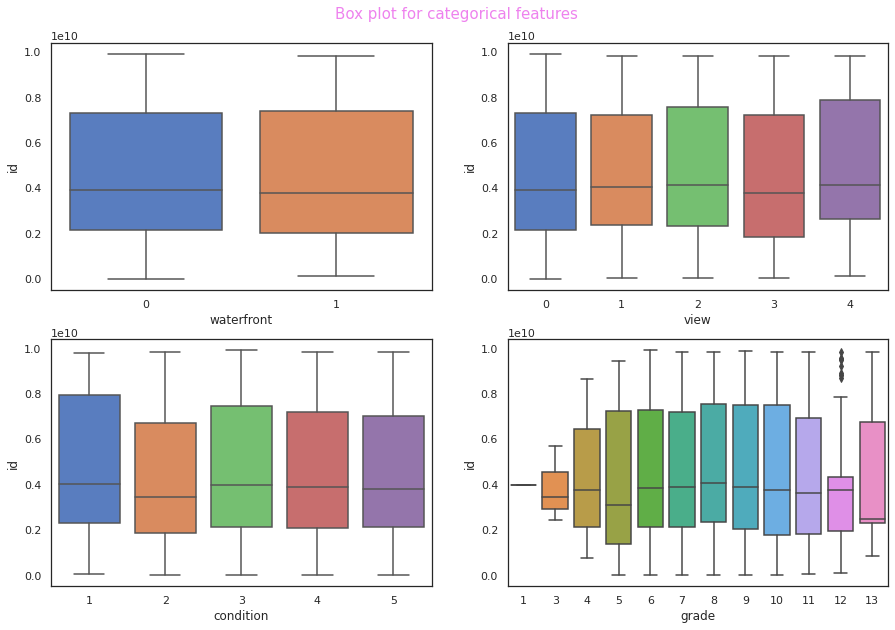

In [46]:
cat_columns = ['waterfront', 'view', 'condition', 'grade']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for categorical features', y= 0.93, color = 'violet', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_house, cat_columns):
  sns.boxplot(df_house[name], df_house.id, ax = ax)

From the above analysis the categorical feature have almost no outliers aside from grade .We will retain this since it is useful for prediction

#Section 4: Univariate analysis


## Measures of Central Tendancy

In [47]:
# using a for loop to find the median value of all the numerical columns
for column in num_columns:
  print('\n')
  print(column +':' + str(df[column].median()))



price:450000.0


bedrooms:3.0


bathrooms:2.25


sqft_living:1910.0


sqft_lot:7619.0


floors:1.0


sqft_above:1560.0


sqft_basement:0.0


sqft_living:1910.0


sqft_lot15:7620.0


sqft_living15:1840.0


## Measures of Spread

In [48]:
#calculating variance, standard deviations, skewness and kurtosis values for our columns of interest

for column in col_names:
  print('\n')
  print(column + ', variance: ' +str(df[column].var()))
  print(column + ', std_deviation: ' +str(df[column].std()))
  print(column + ', skewness: ' +str(df[column].skew()))
  print(column + ', kurtosis: ' +str(df[column].kurt()))



price, variance: 134960792965.3561
price, std_deviation: 367370.1035268876
price, skewness: 4.021679945789497
price, kurtosis: 34.5211670627573


bedrooms, variance: 0.8244309261212234
bedrooms, std_deviation: 0.9079817873290319
bedrooms, skewness: 0.5184685733040686
bedrooms, kurtosis: 1.8389942435018058


bathrooms, variance: 0.5931725786910442
bathrooms, std_deviation: 0.7701769788113926
bathrooms, skewness: 0.5110428764158843
bathrooms, kurtosis: 1.2797461421767222


sqft_living, variance: 843562.9264807092
sqft_living, std_deviation: 918.4568179727936
sqft_living, skewness: 1.4714832943044323
sqft_living, kurtosis: 5.242763618248769


sqft_lot, variance: 1715734324.5007353
sqft_lot, std_deviation: 41421.42349679372
sqft_lot, skewness: 13.059730653294862
sqft_lot, kurtosis: 285.0652509240424


floors, variance: 0.30459133834234037
floors, std_deviation: 0.551897941962407
floors, skewness: 0.7261067560778038
floors, kurtosis: -0.5515041518396502


sqft_above, variance: 685740.4800

## Frequency Distributions

###Numerical Features

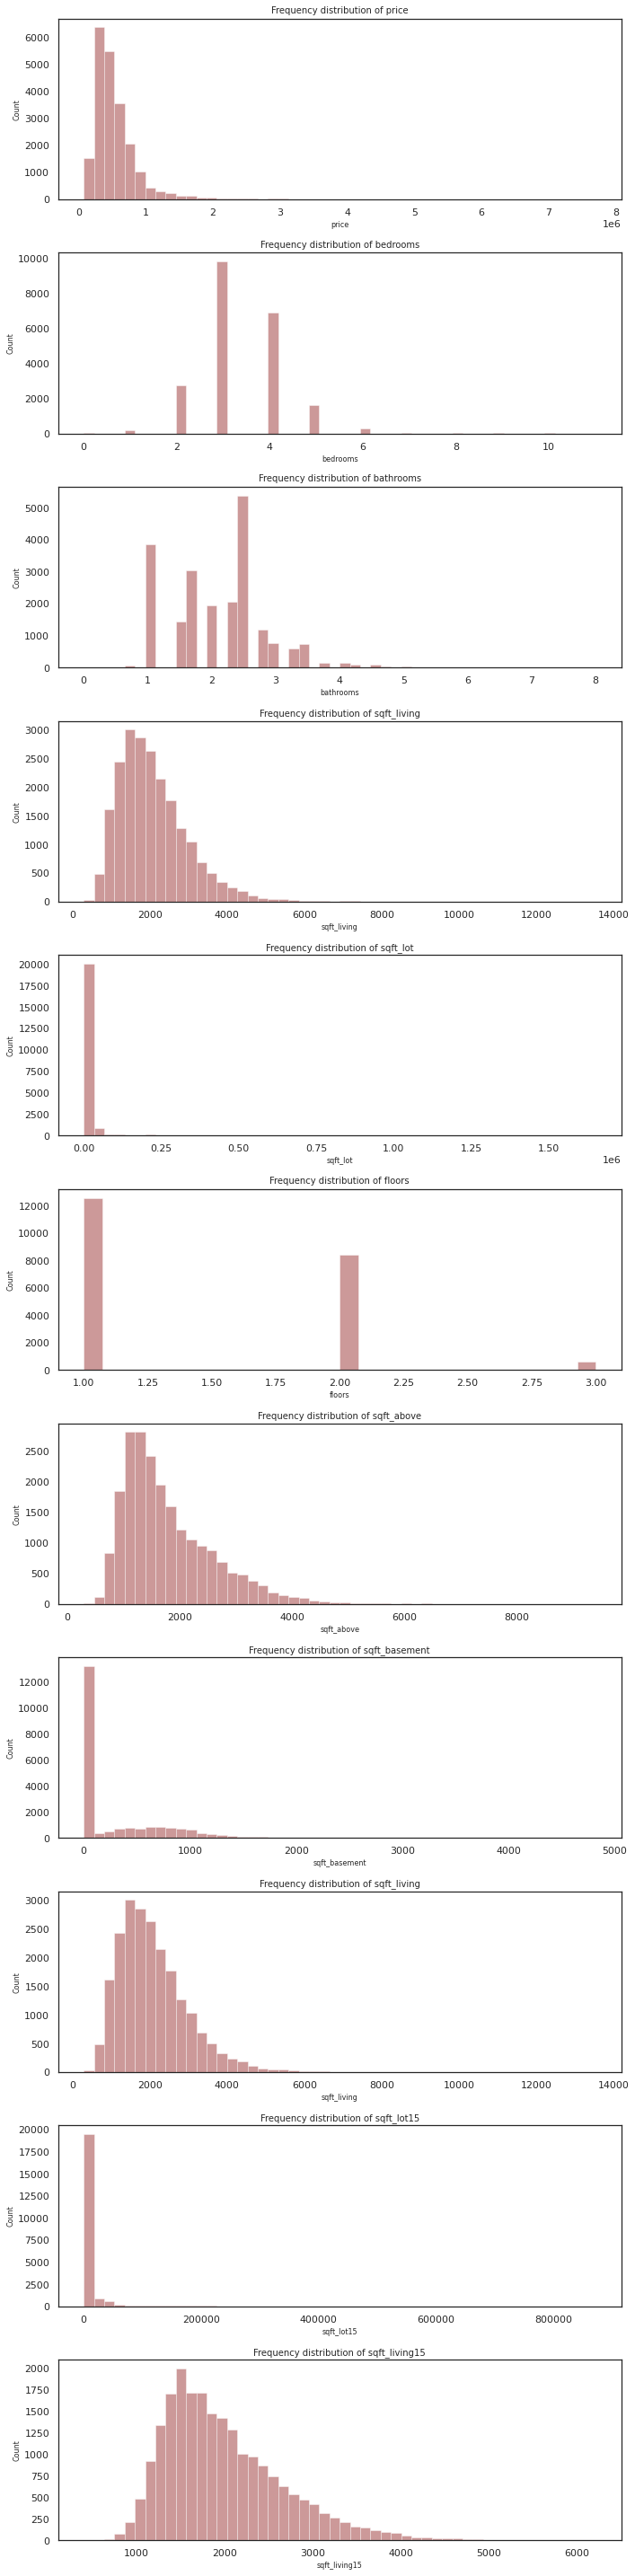

In [49]:
# Plotting distribution of numerical variables
col_names = num_columns
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i], kde = False, color = 'maroon')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

## Bar Charts

### Categorical variables

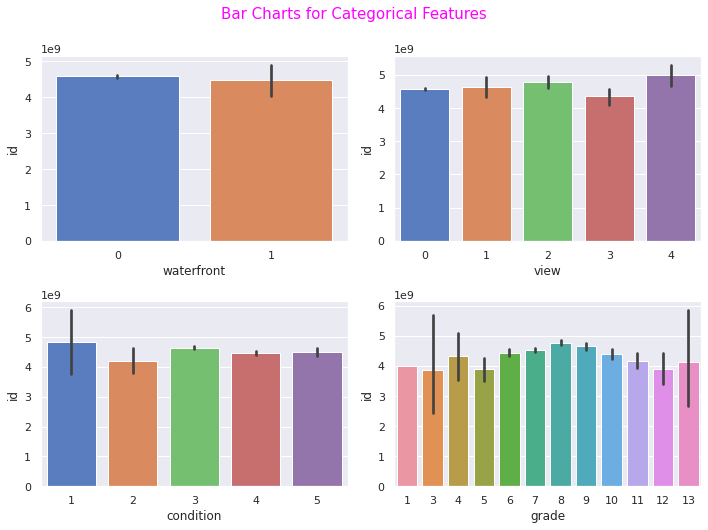

In [50]:
name = cat_columns

# Bar charts of categorical columns according to the household_size
#
sns.set_style('darkgrid')                                             # Setting the grid style of plots to dark
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))     # Ceating four subplots, in two rows and two columns
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Bar Charts for Categorical Features', y = 1.05, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_house, cat_columns):   # Iterating through the subplots
  sns.barplot(df_house[name], df_house.id, ax = ax)                   # Creating a barchart in each subplot
  
plt.tight_layout()  # Fitting the subplots to avoid overlapping

## Summaries of Univariate analysis


# Section 5: Bivariate analysis

## Heatmap of variables

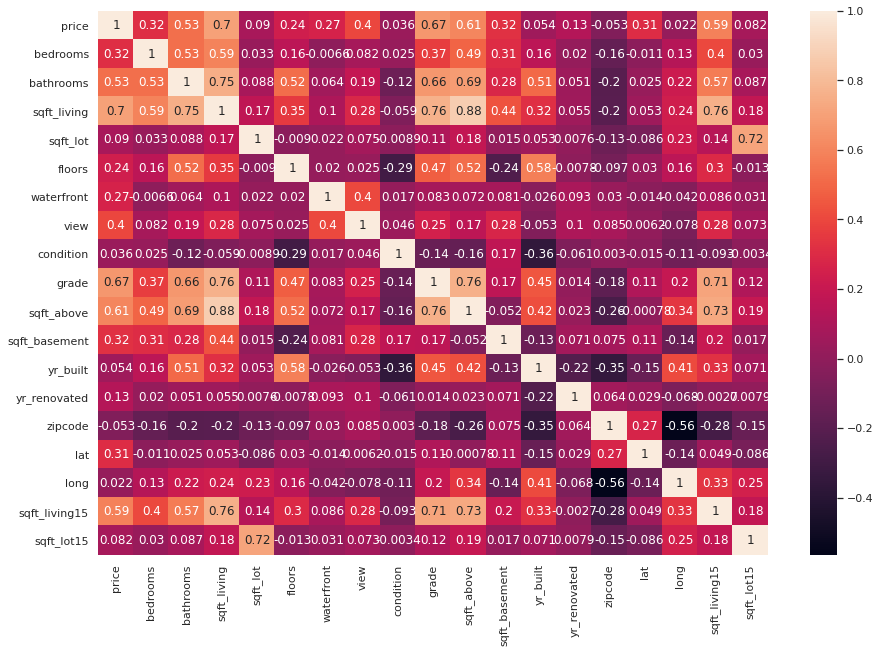

In [51]:
#  checking for correlation using a heatmap

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, ax=ax);

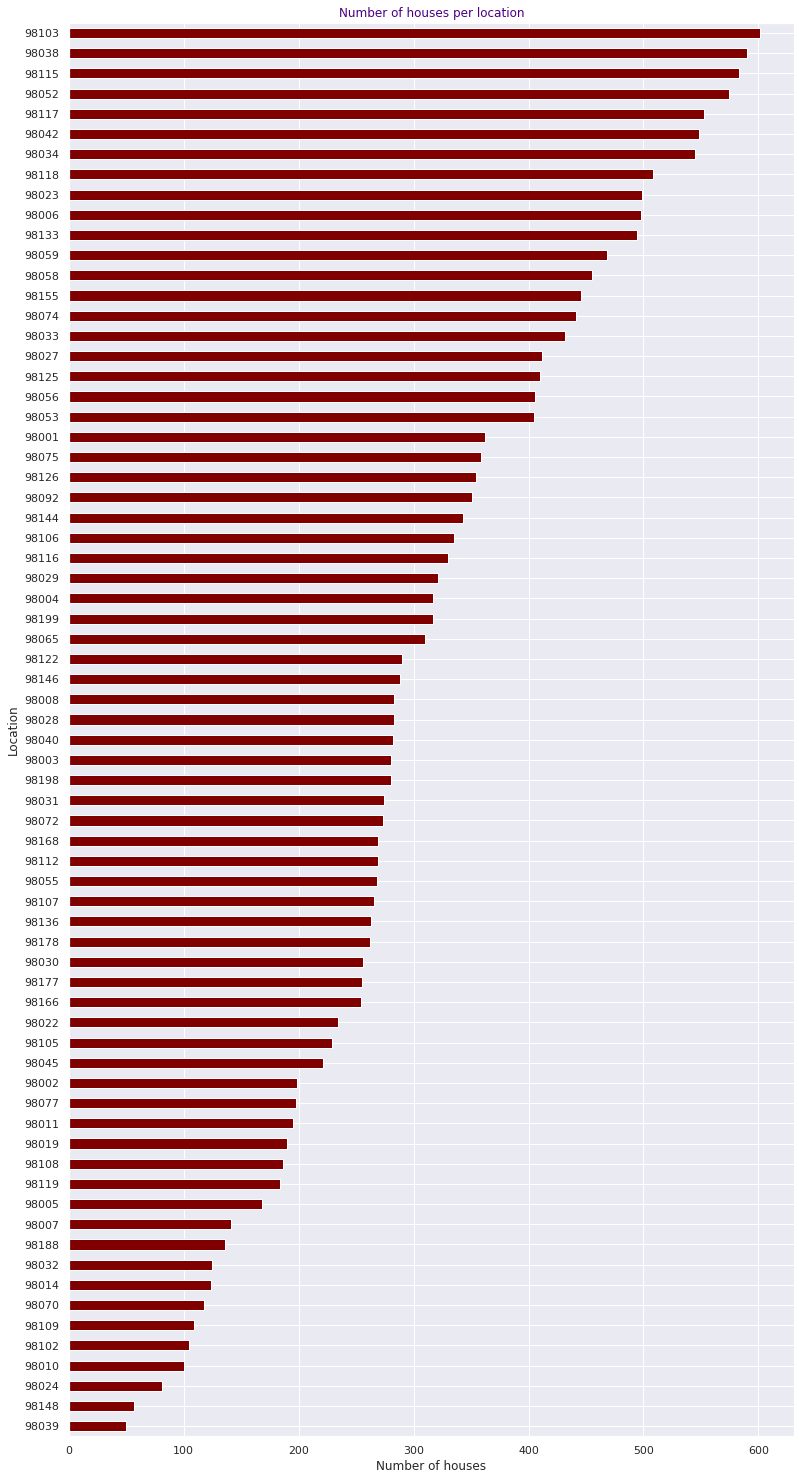

In [52]:
# Creating of zipcodes
# This will assist in displaying if the number of houses in a certain location
# This will show if the data collected was clustered in certain areas.
df_zipcode = df.groupby('zipcode')['zipcode'].count().sort_values(ascending = True)
df_zipcode.plot(kind = 'barh', figsize = (13, 26), color = 'maroon')
plt.title('Number of houses per location', color = 'indigo')
plt.xlabel('Number of houses')
plt.ylabel('Location')
plt.show()

## Answering EDA questions

1. how does year built and condition of houseaffect price of housing?

2. From the data given is there a relationship between house prices and number of bedrooms  and bedrooms

3. How does the zipcode(location) affect the housing prices in the data?

4. what condition is prevelant to tenants in our dataset?

5. Which grade can the tenants afford?



### Question one:
> How does year built affect price of housing?

For this analysis we will plot a scatter plot between variable of year_built, condition of the house and price

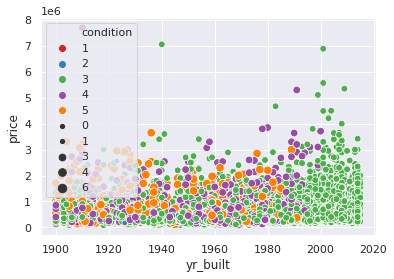

In [54]:

ax = sns.scatterplot(x="yr_built", y="price",hue='condition',size= 'condition',palette='Set1', data=df)

This shows condition one and two are least preffered and also fetch the lowest prices. 

While condition 3 is most seen in the data. For condition 3 the price is both low and high. This should be plotted against a diffent variable such as zipcode(location)
Condition 4 and 5 fetch relatively most high prices. 

This shows tenants prefer and will to pay for housing with these conditions to view the difference in price and condition clearly we could plot against zipcode


###Question Two: 
> From the data given is there a relationship between house prices and number of bedrooms  and bedrooms?

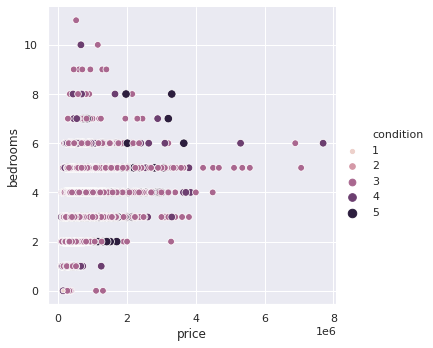

In [55]:
# Plot the lines on two facets
sns.relplot(x="price", y="bedrooms",
            hue="condition",size="condition", 
            legend="full", data=df)

The increase in price of houses against number of bedrooms is majorly influenced by the condition..In this data there is an overall increase in price with increase of bedrooms with condition 3-5

Although, houses with less than 6 bedroom and condition one show that they fair about the same amount of price in the market.



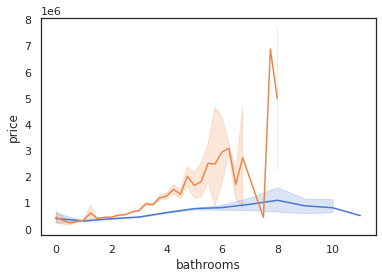

In [56]:
sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
sns.lineplot(x='bedrooms', y='price', data=df)
sns.lineplot(x='bathrooms', y='price', data=df)

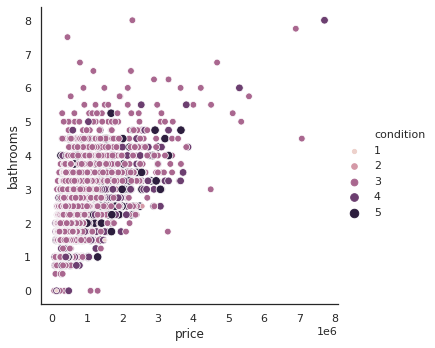

In [62]:
# Plot the lines on two facets
sns.relplot(x="price", y="bathrooms",
            hue="condition",size="condition", 
            legend="full", data=df)

Here we also witness a steady increase in price for an increase in number of bedrooms with condition being a very important determining factor.

### Question Three:
> How does the zipcode(location) affect the housing prices in the data?

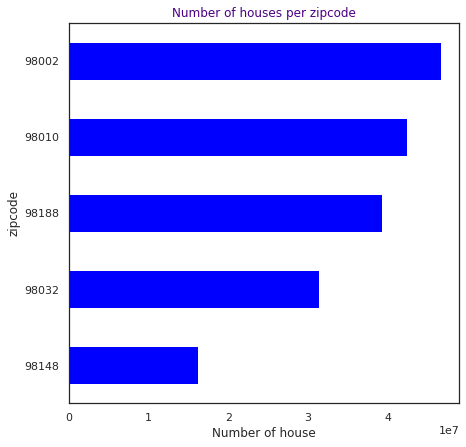

In [74]:
df1=df.groupby(pd.Grouper(('zipcode')))
df2=df1['price'].sum().sort_values(ascending=True)
df3 =df2.head()
df3.plot(kind = 'barh',figsize = (7,7), color = 'blue' )
plt.title('Number of houses per zipcode', color = 'indigo')
plt.xlabel('Number of house')
plt.ylabel('zipcode')
plt.show()


The most popular zipcode is 98002. This could also mean that the rates are higher in 98002

### Question Four:
what condition is prevelant to tenants in our dataset?

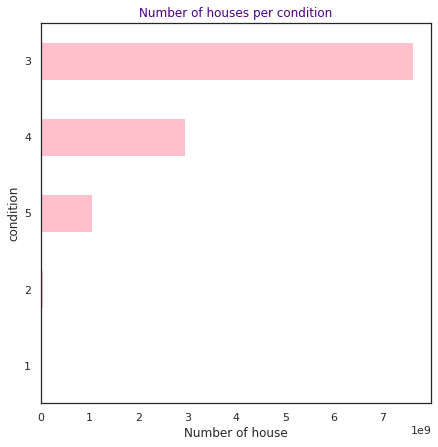

In [73]:
df1=df.groupby(pd.Grouper(('condition')))
df2=df1['price'].sum().sort_values(ascending=True)
df3.plot(kind = 'barh',figsize = (7,7), color = 'pink' )
plt.title('Number of houses per condition', color = 'indigo')
plt.xlabel('Number of house')
plt.ylabel('condition')
plt.show()

The most prevalent condition is three. Most of the houses in the dataset are of the third condition followed by fourth and fifth.

### Question Five:
> Which grade can the tenants afford?


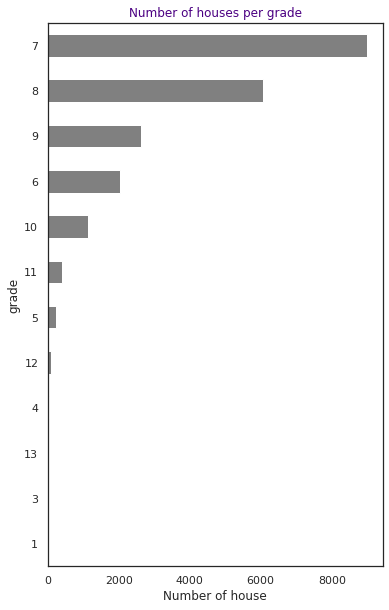

In [72]:
df_zipcode = df.groupby('grade')['grade'].count().sort_values(ascending = True)
df_zipcode.plot(kind = 'barh', figsize = (6, 10), color = 'gray')
plt.title('Number of houses per grade', color = 'indigo')
plt.xlabel('Number of house')
plt.ylabel('grade')
plt.show()

# Section 6:Multivariate analysis and Implementing solution

In [97]:
# find the best 7 features to predict the price of housing given features below
#X = df.drop("price",axis=1)
#Y =df['price']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Feature extraction
model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False  True  True False  True  True  True]
Feature Ranking: [3 1 1 2 1 1 1]


In [ ]:
df.columns

| Feature   | Price Feature Selection |
|----------|--------------|
| Price | Dependent variable |
| Bedrooms| 4 |
| Bathrooms | 5 |
| Sqft_living | 1 |
| Sqft_Loft | 12 |
| Floors | 7 |
| Waterfront | 1 |
| View | 1|
| Condition | 1|
| Grade | 1 |
| Sqft_above | 2 |
| Sqft_basement | 3 |
| Yr_Built | 6 |
| Yr_Renovated | 10 |
| Zipcode | 8 |
| Lat | 1 |
| Long | 1 |
| Sqft_living15 | 9 |
| Sqft_lot15 | 11 |




### Multicollinearity

In [77]:
#Selecting the important Features
col = ['price','sqft_living', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long']
# Let's display the correlations between the variables
reg_df = df[col]
correlations = df[col].corr()
correlations


,price,sqft_living,waterfront,view,condition,grade,lat,long
price,1.000000,0.702055,0.266332,0.397352,0.036366,0.667476,0.306914,0.021582
sqft_living,0.702055,1.000000,0.103816,0.284606,-0.058704,0.762701,0.052552,0.240209
waterfront,0.266332,0.103816,1.000000,0.401857,0.016665,0.082773,-0.014270,-0.041914
view,0.397352,0.284606,0.401857,1.000000,0.046031,0.251315,0.006170,-0.078413
condition,0.036366,-0.058704,0.016665,0.046031,1.000000,-0.144632,-0.015048,-0.106423
grade,0.667476,0.762701,0.082773,0.251315,-0.144632,1.000000,0.114111,0.198355
lat,0.306914,0.052552,-0.014270,0.006170,-0.015048,0.114111,1.000000,-0.135481
long,0.021582,0.240209,-0.041914,-0.078413,-0.106423,0.198355,-0.135481,1.000000


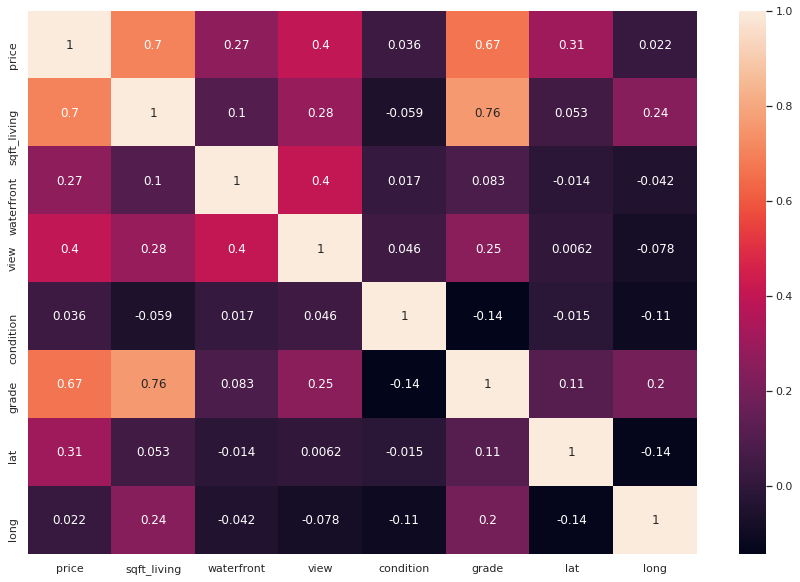

In [78]:
#Plotting heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlations, annot=True, ax=ax);

In [80]:
#The VIF matrix
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,price,sqft_living,waterfront,view,condition,grade,lat,long
price,3.016051,-1.343052,-0.431303,-0.389691,-0.272142,-0.861088,-0.730566,0.251749
sqft_living,-1.343052,3.128218,0.181210,-0.098231,-0.010930,-1.445891,0.363301,-0.387692
waterfront,-0.431303,0.181210,1.255281,-0.427114,0.046189,0.150270,0.123801,-0.023216
view,-0.389691,-0.098231,-0.427114,1.371724,-0.033911,-0.022037,0.131205,0.140203
condition,-0.272142,-0.010930,0.046189,-0.033911,1.065522,0.327404,0.072590,0.066064
grade,-0.861088,-1.445891,0.150270,-0.022037,0.327404,2.743285,0.015916,-0.136675
lat,-0.730566,0.363301,0.123801,0.131205,0.072590,0.015916,1.220798,0.113939
long,0.251749,-0.387692,-0.023216,0.140203,0.066064,-0.136675,0.113939,1.147292


The VIF score for each variable is found alongside the
downwards sloping diagonal.

Since the VIF score is not above 5 we will keep our variables


### Baseline model

In [81]:
#Assigning X and y. 
#X is the independent variables
#y is the dependent variable

X = reg_df.drop('price', axis=1)
y = reg_df['price']

In [82]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 



44745451687.22235


This mean standard error score of 44745451687.22235 is 
our benchmark for determining if other regression will work with the data

In [83]:
#Below coeffiecients

coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline

{'condition': 50944.94098901954,
 'grade': 89227.39575298899,
 'lat': 642204.8128320485,
 'long': -217740.802105455,
 'sqft_living': 178.11452962051914,
 'view': 61939.445153954846,
 'waterfront': 607205.5505262383}

In [85]:
from statsmodels.formula.api import ols
mod = ols(formula='y ~ X', data=reg_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     6222.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:53:23   Log-Likelihood:            -2.9568e+05
No. Observations:               21612   AIC:                         5.914e+05
Df Residuals:                   21604   BIC:                         5.914e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.786e+07   1.34e+06    -43.172      0.0

* Adjusted. R-squared reflects the fit of the model. R-squared of our model is 0.668 which shows a better fit for the model
* Const Coefficient is the y intercept which is -5.786e+07

In [114]:
#Since multi-linear formular for prediction is:
#Y = C + M1*X1 + M2*X2 + …, we will use this to predict
#Where C is the constant coefficient
#M is the variable coefficient 
#X is the observation of the variable
x1 =int (input ('sqft_living value:'))
x2 =int (input('Waterfront, yes[1], no[0]:'))
x3 =int (input ('view, yes[1], no[0]:'))
x4 =int (input ('Condition, [1,2,3,4,5]:'))
x5 =int (input ('Grade, [1,2,3,4,5,6,7,8,9,10,11,12,13]:'))
x6 =input ('Latitude:')
x7 =input ('Longitude')

sqft_living_coef = 178.11452962051914
wf_coef = 607205.5505262383
view_coef = 61939.445153954846
condition_coef = 50944.94098901954
grade_coef = 89227.39575298899,
lat_coef= 642204.8128320485,
long_coef = -217740.802105455
Housing_price_pred = -5.786e+07 + (sqft_living_coef * x1) + (wf_coef *x2) + (view_coef *x3) + (condition_coef *x4) + (grade_coef *x5) + (lat_coef *x6) +(long_coef *x7)
print(Housing_price_pred)
#-56916849.51902171

sqft_living value:1200
Waterfront, yes[1], no[0]:1
view, yes[1], no[0]:0
Condition, [1,2,3,4,5]:5
Grade, [1,2,3,4,5,6,7,8,9,10,11,12,13]:12
Latitude:5678
Longitude456


TypeError: ignored

### Multi-linear model after standardizing

In [87]:
# Dividing our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
#Training the algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,179.058978
waterfront,627737.277485
view,63513.936283
condition,50825.303840
grade,87560.317987
lat,648925.673655
long,-216985.511188


In [117]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9789,900000,1.003977e+06
10279,405000,3.961105e+05
19724,780000,9.319339e+05
20060,379950,4.999507e+05
21204,1060000,8.460117e+05
...,...,...
21165,654000,6.811592e+05
8107,330000,3.494116e+05
19729,600000,1.081981e+06
16123,382500,3.567800e+05


In [119]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 131423.8419918714
Mean Squared Error: 43024878357.27259
Root Mean Squared Error: 207424.39190527375


The mean squared error of the baseline model is 44745451687.22235 and the mean squared error of our model using multi- linear regression is 43024878357.27259. Our model shows a slight improvement

In [122]:
#Prediction using multi- linear Regression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y), 'regression score')

print(reg.coef_, 'regression coefficient')

print(reg.intercept_, 'regression intercept')





0.668440580421163 regression score
[ 1.78114530e+02  6.07205551e+05  6.19394452e+04  5.09449410e+04
  8.92273958e+04  6.42204813e+05 -2.17740802e+05] regression coefficient
-57860516.00122696 regression intercept


The regression score of the multi-linear regression is 0.668. This shows that it is a better fit just as the baseline model which also had a score of 0.668


## Quantile Regression

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [124]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
#Importing mlinsights from pip 
#mlinsights is not found in scickit learn 
!pip install mlinsights

     |████████████████████████████████| 870kB 2.8MB/s 
  Created wheel for mlinsights: filename=mlinsights-0.2.463-cp36-cp36m-linux_x86_64.whl size=1500451 sha256=b69fddf736b3df7483047f9a307cdc80261f9f950b8536186a4e2583a47a8d6a
  Stored in directory: /root/.cache/pip/wheels/5a/79/ff/8f9f4b15caadc0f07d3c7a79201164f9c8f234d4896a73f252
Successfully built mlinsights


In [126]:
from mlinsights.mlmodel import QuantileLinearRegression
clq = QuantileLinearRegression()
clq.fit(X_train, y_train)

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
                         max_iter=10, n_jobs=1, normalize=False, quantile=0.5,
                         verbose=False)

In [127]:
#Linear correlation and quantile corrlations

linear_correlation = pd.DataFrame(clr.coef_, X.columns, columns=['Linear_Coefficient'])
linear_correlation

,Linear_Coefficient
sqft_living,179.549914
waterfront,609845.307881
view,63706.179834
condition,50919.958074
grade,85783.468297
lat,652697.326740
long,-217617.035607


In [128]:
quantile_cor_mean = pd.DataFrame(clq.coef_, X.columns, columns=['Quantile_coefficient at mean'])
quantile_cor_mean

,Quantile_coefficient at mean
sqft_living,140.222570
waterfront,524953.734639
view,60736.135374
condition,45304.176312
grade,77505.202486
lat,640444.592087
long,-116931.329605


In [130]:
# 0 .25 quantile 
qu = 0.25

clqs = QuantileLinearRegression(quantile=qu)
clqs.fit(X_train, y_train)
quantile_cor = pd.DataFrame(clqs.coef_, X.columns, columns = ['quantile_0.25'])
quantile_cor




,quantile_0.25
sqft_living,117.829970
waterfront,351419.195970
view,47797.853195
condition,42546.633911
grade,80011.554172
lat,578482.298275
long,-49020.426830


In [131]:
#Quantile score
clq.score(X,y)

124674.98505216057

In [132]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = clr.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9789,900000,1.000435e+06
10279,405000,3.971524e+05
19724,780000,9.305077e+05
20060,379950,4.986969e+05
21204,1060000,8.420794e+05
...,...,...
11067,500000,2.907785e+05
9918,605000,5.638464e+05
1956,420850,1.847076e+05
12455,1070000,1.090731e+06


In [133]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 132819.29956835957
Mean Squared Error: 44863613467.31663
Root Mean Squared Error: 211810.3242698916


In [134]:
# Making Predictions of the quatile regression at 0.5
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = clq.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9789,900000,903787.821864
10279,405000,425904.957118
19724,780000,858724.688057
20060,379950,463082.763206
21204,1060000,786808.903659
...,...,...
11067,500000,314139.603826
9918,605000,541812.727295
1956,420850,256467.409642
12455,1070000,977638.671085


In [135]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125191.45921860728
Mean Squared Error: 47645864449.38045
Root Mean Squared Error: 218279.32666512523


In [138]:
import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ sqft_living + waterfront + view + condition + grade + lat + long ',X)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4323
Model:                       QuantReg   Bandwidth:                   2.096e+04
Method:                 Least Squares   Sparsity:                    2.857e+05
Date:                Sun, 02 Aug 2020   No. Observations:                21612
Time:                        18:10:15   Df Residuals:                    21604
                                        Df Model:                            7
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.348e+07   9.05e+05    -14.897      0.000   -1.53e+07   -1.17e+07
sqft_living   107.4877      1.683     63.859      0.000     104.189     110.787
waterfront   4.916e+05   1.23e+04     40.059      0.000    4.68e+05    5.16e+05
view         6.837e+04   1457.852     46.897   

The psuedo R squared is 0.4323. This shows that our model didn't do a good job

## Ridge Regression

In [139]:
#Creating a ridge regression model
# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

# Making predictions
#
y_pred = ridge.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of Ridge: 240869.92873402702
Mean of y: 540177.5401628725


### Confirming the appropriate alpha and parameters for ridge regression

In [140]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8)}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=Ridge(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

Best score is 211906.74124019974 and the best parameters are {'alpha': 0.001}


### Modelling using the appropriate Alpha

In [141]:
# Training the model with the optimal alpha value
#
ridge = Ridge(normalize=True, alpha = 0.001)
ridge.fit(X_train, y_train)

# Making predictions
#
y_pred = ridge.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of Ridge: 212067.2774746993
Mean of y: 540177.5401628725


### Performing cross validation to determine over-fitting or underfitting

In [142]:
from sklearn.model_selection import cross_val_score
# Performing cross validation of ten folds
#
scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 211906.7412401998
Standard deviation of the cross validation scores is 5651616001.084


The mean is lower than the variance. This shows the model is unstable

### Checking for appropriateness of model using residual plots

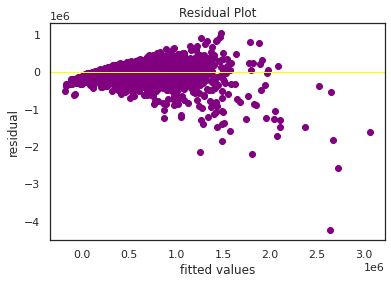

In [143]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='purple')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='yellow', linewidth=1)
plt.show()

### Checking for Heteroskedasticity using Barlette's Test

In [145]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The model does not need to be reassessed')
  print('the variances are homogeneous!')

inf
The model does not need to be reassessed
the variances are homogeneous!


## Lasso Regression


In [146]:
#Creating a lasso regression model
# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#Scaling the data
#Scaling data or standardization is important since it helps speed up calculation in an algorithm
# Building a lasso model where alpha is 1
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Creating lasso object
lasso = linear_model.Lasso()
lasso  = Lasso(normalize=True)
lasso.fit(X_train, y_train)

# Making predictions
#
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of lasso: 212063.98586244718
Mean of y: 540177.5401628725


### Cross validation using K-Cross and finding optimal alpha

In [147]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8)}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=Lasso(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

Best score is 211907.01517433187 and the best parameters are {'alpha': 0.01}


### Modelling using the appropriate alpha

In [148]:
# Training the model with the optimal alpha value
#
lasso = Lasso(normalize=True, alpha = 0.01)
lasso.fit(X_train, y_train)

# Making predictions
#
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of Lasso: 212060.83602815043
Mean of y: 540177.5401628725


### performing cross validation to determine overfitting and underfitting

In [149]:
# Performing cross validation of ten folds
#
scores = cross_val_score(lasso, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 211907.015174333
Standard deviation of the cross validation scores is 5646588920.212


### Checking for appropriateness of model using residual plots

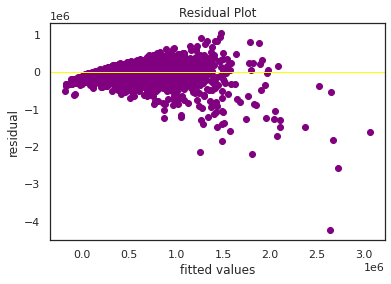

In [150]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='purple')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='yellow', linewidth=1)
plt.show()

### Checking for Heteroskedasticity using Barlette's Test

In [151]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [152]:
#Scaling the data
#Scaling data or standardization is important since it helps speed up calculation in an algorithm
# Building a lasso model where alpha is 1
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6684405803842343
lasso MSE: 44745451692.206055
lasso coef: [163586.35735357  52532.96367612  47464.96735234  33146.43304649
 104881.50081529  88983.75649032 -30662.5922081 ]


In [153]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 

# Dividing our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)


lasso best parameters: {'alpha': 24.0}
lasso score: 0.6616853421269884
linear score: 0.6616808061136461
lasso MSE: 43024301501.37494
linear MSE: 43024878357.2726
lasso best estimator coef: [164445.99195259  54292.84806765  48666.7817914   33044.19834439
 102901.61928326  89897.2022664  -30533.24238298]
linear coef: [164454.13440416  54310.0606093   48671.73999515  33069.64110359
 102922.79890649  89915.78073889 -30557.22100673]


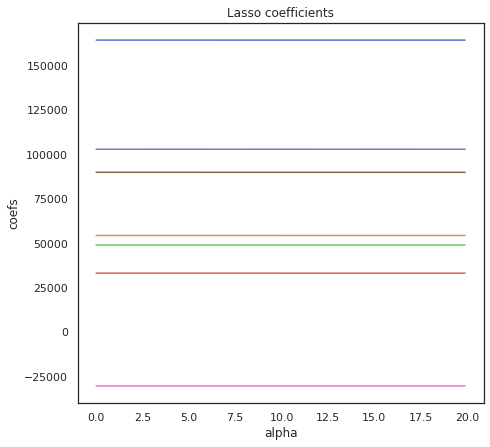

In [154]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


### Elastic Net Regression

In [156]:
#Creating an ElasticNet regression model
# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
elastic = ElasticNet(normalize=True)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Elastic: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of Elastic: 372692.5824076282
Mean of y: 540177.5401628725


### Cross validation using Kfold and finding optimal alpha

In [157]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8)}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=ElasticNet(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

Best score is 212596.43616764492 and the best parameters are {'alpha': 1e-05}


### Modelling using the appropriate alpha 

In [158]:
# Training the model with the optimal alpha value
#
elastic = ElasticNet(normalize=True, alpha = 1e-05)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of ElasticNet: 213007.04897396418
Mean of y: 540177.5401628725


### Performing cross validation to determine if the data is over fitted or not

In [ ]:
# Performing cross validation of ten folds
#
scores = cross_val_score(elastic, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

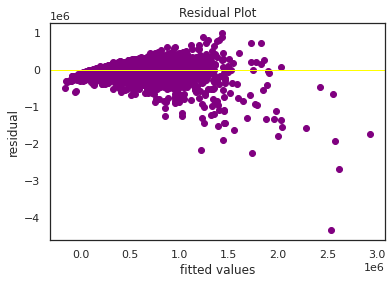

In [159]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='purple')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='yellow', linewidth=1)
plt.show()

In [160]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [161]:
#Elastic Net Model

elastic =ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [162]:
#Fitting our model
search.fit(X,y)
search.best_params_
abs(search.best_score_)

44954477184.07931

In [163]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.85)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

44784796467.6483


In [164]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_, reg_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'condition': 106006.03090069589,
 'grade': 86590.07090558912,
 'lat': -28857.119831165957,
 'price': 157194.95826785703,
 'sqft_living': 51218.153934969414,
 'view': 32041.470519638562,
 'waterfront': 48176.15007795529}

In [165]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)
ElasticNet(random_state=0)
print(regr.coef_, 'regression coefficient')

print(regr.intercept_, 'regression intercept')

print(regr.predict([[1, 5]]))

[18.83816048 64.55968825] regression coefficient
1.4512607561654032 regression intercept
[343.08786247]
